In [1]:
import numpy as np
import pandas as pd
import gc

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

%matplotlib inline

In [3]:
print("Read data file to obtain some statistic about the features and target")
data = pd.read_csv('data.csv')
print "shape of data file: ", data.shape

Read data file to obtain some statistic about the features and target
shape of data file:  (80000, 26)


In [18]:
dt = data[['loan_amnt', 'installment', 'annual_inc', 'dti', 'fico_range_low', 'fico_range_high']]

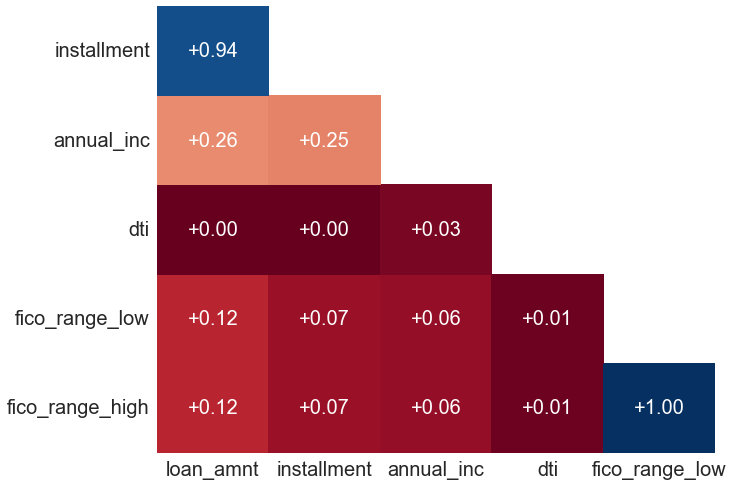

In [6]:
corr = dt.corr()

corr.drop(['loan_amnt'], axis=0, inplace=True)
corr.drop(['fico_range_high'], axis=1, inplace=True)

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True

plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20

fig, axs = plt.subplots(figsize=(10, 8))
axs.set_axis_bgcolor("white")
                     
with sns.axes_style("white"):
    sns.heatmap(abs(corr), mask=mask, annot=True, annot_kws={"size":20}, cmap='RdBu', fmt='+.2f', cbar=False)

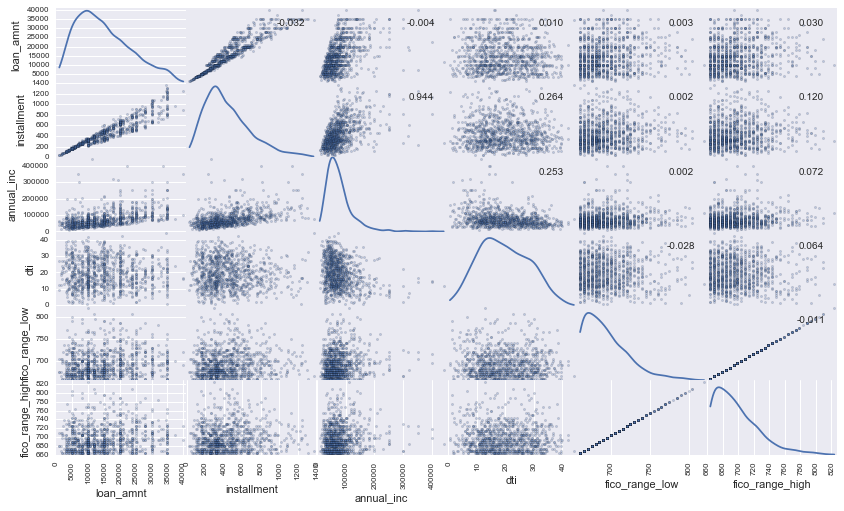

In [12]:
axes = pd.scatter_matrix(dt.sample(1000), alpha = 0.3, figsize = (14,8), diagonal = 'kde')
corr = data.corr().as_matrix()
for i, j in zip(*np.triu_indices_from(axes, k=1)):
    axes[i, j].annotate("%.3f" %corr[i,j], (0.8, 0.8), xycoords='axes fraction', ha='center', va='center')

In [22]:
dt.loc[:,"fico_range_low"] = np.log(dt["fico_range_low"])
#dt["annual_inc"]  = np.log(dt["annual_inc"])

C:\Users\Amin\Anaconda2\lib\site-packages\pandas\core\indexing.py:549: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value


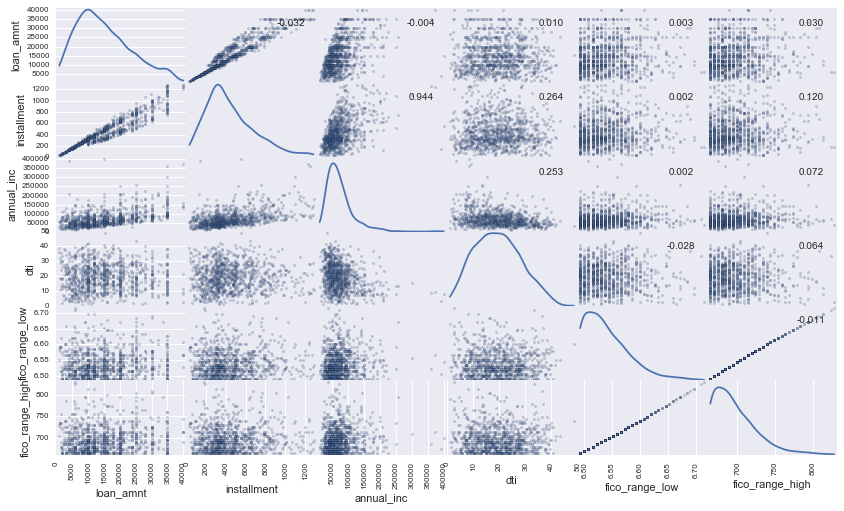

In [24]:
axes = pd.scatter_matrix(dt.sample(1000), alpha = 0.3, figsize = (14,8), diagonal = 'kde')
corr = data.corr().as_matrix()
for i, j in zip(*np.triu_indices_from(axes, k=1)):
    axes[i, j].annotate("%.3f" %corr[i,j], (0.8, 0.8), xycoords='axes fraction', ha='center', va='center')

In [23]:
dt.head()

,loan_amnt,installment,annual_inc,dti,fico_range_low,fico_range_high
0,30000.0,761.64,100100.0,27.42,6.536692,694.0
1,30000.0,692.93,235000.0,7.50,6.507278,674.0
2,16000.0,379.39,84000.0,27.87,6.599870,739.0
3,14000.0,439.88,50000.0,21.65,6.586172,729.0
4,7500.0,252.67,68000.0,29.09,6.492240,664.0
